# Test three image alpha blend

In [1]:
import math
import numpy as np

# Import DiskFind utilities for PredatorEye.
import sys
sys.path.append('/content/drive/My Drive/PredatorEye/shared_code/')
import DiskFind as df

df.set_global_random_seed(20220113)

df.relative_disk_radius() = 0.09814453125
image_size = 128
disk_radius = 12.5625
disk_radius_int = 13
matte.shape = (26, 26, 1)


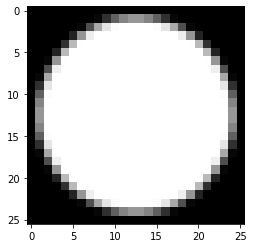

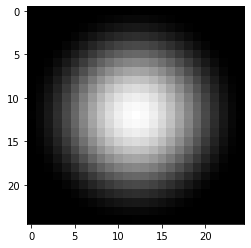

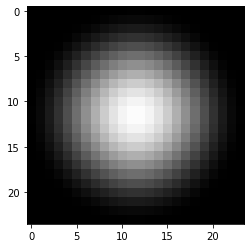

In [37]:
# See SO question "Numpy - multiple 3d array with a 2d array"
#     Based on this SO answer: https://stackoverflow.com/a/46930388/1991373
#     See also about np.tensordot: https://stackoverflow.com/a/46930585/1991373

print('df.relative_disk_radius() =', df.relative_disk_radius())

image_depth = 3
image_size = 128
disk_radius = image_size * df.relative_disk_radius()
disk_radius_int = round(disk_radius)
disk_diameter_int = disk_radius_int * 2
image_shape = (image_size, image_size, image_depth)
disk_shape = (disk_diameter_int, disk_diameter_int, image_depth)
disk_matte_shape = (disk_diameter_int, disk_diameter_int, 1)

print('image_size =', image_size)
print('disk_radius =', disk_radius)
print('disk_radius_int =', disk_radius_int)

# matte = np.ones(disk_matte_shape, dtype=np.float32)
matte = np.zeros(disk_matte_shape, dtype=np.float32)
print('matte.shape =', matte.shape)


# Draw soft-eged disk with given centerpoint and color.
# (Copied from Find_3_disks)
def draw_disk(center, color, image):
    cx = int(center[0])
    cy = int(center[1])
    dr = int(disk_radius)

    # TODO temp for debugging
    color = np.array(color)
    bg_color = np.zeros(color.shape)
    image[:,:] = 0.81

    for x in range(cx - dr, cx + dr + 1):
        for y in range(cy - dr, cy + dr + 1):
            d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
            if (d <= dr):
                blend = df.spot_utility((x, y), center, dr * 0.85, dr)
                image[x, y, :] = df.interpolate(blend, bg_color, color) 
    print_matte(image)
    return image

def print_matte(image):
    for y in range(disk_diameter_int):
        line = ''
        for x in range(disk_diameter_int):
            s = '   ' +str(int(image[x, y][0] * 99))
            line += s[-2:] + ' '
        print(line)

# matte = draw_disk((disk_radius_int, disk_radius_int), [1.0], matte)
# df.draw_image(np.concatenate((matte, matte, matte), axis=2))


# Generate a soft disk matte, an array with shape (diameter, diameter, 1).
# Uses the TexSyn Spot parameters: inner_radius and outer_radius.
# TODO can outer_radius always be (diameter / 2.0)?
def make_disk_matte(diameter, inner_radius, outer_radius):
    # Coerce diameter to be int, to be used as an index for pixels.
    diameter = round(diameter)
    # Make the array to return.
    image = np.zeros((diameter, diameter, 1), dtype=np.float32)
    # Centerpoint of disk (as float, independent of pixel boundaries).
    cp = (diameter / 2.0, diameter / 2.0)
    # Loop over all pixel coordiantes (xi, yi) with (xf, yf) as center of pixel.
    for xi in range(diameter):
        xf = xi + 0.5
        for yi in range(diameter):
            yf = yi + 0.5
            image[xi, yi, :] = df.spot_utility((xf, yf), cp,
                                                inner_radius, outer_radius)
            # # TODO temp for debugging
            # d = math.sqrt(math.pow(xf - cp[0], 2) + math.pow(yf - cp[1], 2))
            # if (d > outer_radius):
            #     image[xi, yi, :] = 0.81
    return image

matte = make_disk_matte(disk_diameter_int,
                        disk_radius * 0.85,
                        disk_radius)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte = make_disk_matte(25, 0, 12.5)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte = make_disk_matte(24, 0, 12)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte.shape = (10, 10, 1)
matte[0,0,:] = [0.]


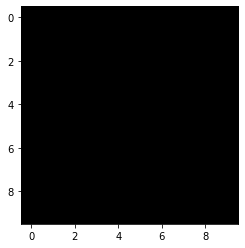

matte.shape = (10, 10, 1)
matte[0,0,:] = [1.]


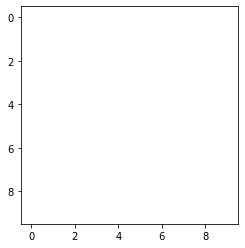

matte.shape = (10, 10, 1)
matte[0,0,:] = [0.5]


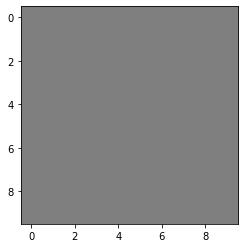

matte.shape = (10, 10, 1)
matte[0,0,:] = [0.8166648]


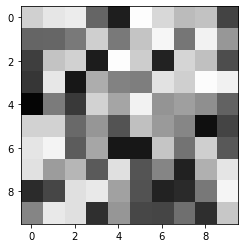

In [3]:
matte = np.zeros((10, 10, 1), dtype=np.float32)
print('matte.shape =', matte.shape)
print('matte[0,0,:] =', matte[0,0,:])
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte[:,:] = 1
print('matte.shape =', matte.shape)
print('matte[0,0,:] =', matte[0,0,:])
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte[:,:] = 0.5
print('matte.shape =', matte.shape)
print('matte[0,0,:] =', matte[0,0,:])
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte = np.random.rand(10, 10, 1).astype(np.float32)
print('matte.shape =', matte.shape)
print('matte[0,0,:] =', matte[0,0,:])
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

rgb.shape = (10, 10, 3)
rgb[0,0,:] = [0. 0. 0.]


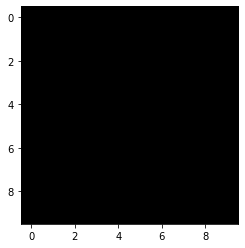

rgb.shape = (10, 10, 3)
rgb[0,0,:] = [1.  0.5 0. ]


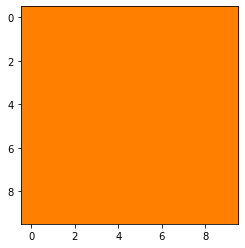

rgb.shape = (10, 10, 3)
rgb[0,0,:] = [0.53839076 0.32074472 0.907942  ]


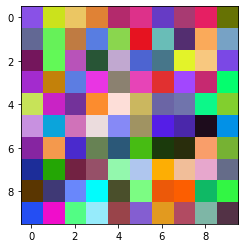

In [8]:
rgb = np.zeros((10, 10, 3), dtype=np.float32)
print('rgb.shape =', rgb.shape)
print('rgb[0,0,:] =', rgb[0,0,:])
df.draw_image(rgb)

rgb[:,:,:] = [1.0, 0.5, 0.0]
print('rgb.shape =', rgb.shape)
print('rgb[0,0,:] =', rgb[0,0,:])
df.draw_image(rgb)

rgb = np.random.rand(10, 10, 3).astype(np.float32)
print('rgb.shape =', rgb.shape)
print('rgb[0,0,:] =', rgb[0,0,:])
df.draw_image(rgb)

# Checkerboard test pattern

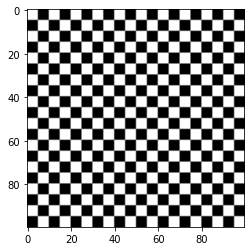

In [25]:
# Generate image (rgb pixel tensor) with a black and white checkerboard pattern.
def make_checkerboard(size, half_wavelength):
    image = np.zeros((size, size, 3), dtype=np.float32)
    for x in range(size):
        for y in range(size):
            if 0 == ((int(x / half_wavelength) + int(y / half_wavelength)) % 2):
                image[x, y, :] = [1, 1, 1]
    return image

df.draw_image(make_checkerboard(100, 5))

# Soft matte

bg.shape = (26, 26, 3)


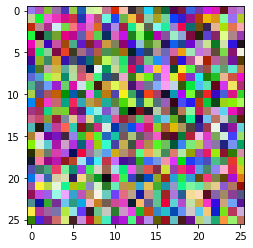

fg.shape = (26, 26, 3)


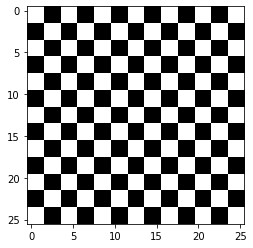

matte.shape = (26, 26, 1)


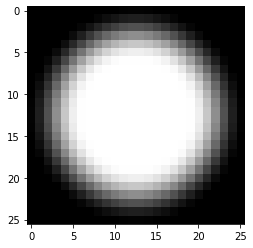

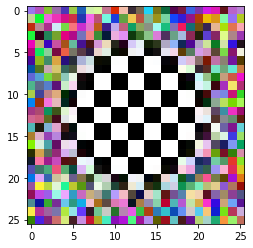

In [54]:
def soft_matte(foreground, background, matte):
    check_soft_matte_args(foreground, background, matte)


    # First you can reshape A in a way that its fibers (or depth vectors A[:,:,i]) will be placed as columns in matrix C:
    # C = A.reshape(x*y,3).T
    # Then using a simple matrix multiplication you can do:
    # D = numpy.dot(B,C)
    # Finally bring the result back to the original dimensions:
    # D.T.reshape([x,y,3])

    x = foreground.shape[0]
    y = foreground.shape[1]

    Af = foreground
    Bf = matte.reshape(x*y,1).T
    Cf = Af.reshape(x*y,3).T
    Df = Bf * Cf
    Qf = Df.T.reshape([x,y,3])

    Ab = background
    Bb = 1 - matte.reshape(x*y,1).T
    Cb = Ab.reshape(x*y,3).T
    Db = Bb * Cb
    Qb = Db.T.reshape([x,y,3])

    # return Qf
    # return Qf + Qb
    # return Qf + (1 - Qb)
    return Qf + Qb

def check_soft_matte_args(foreground, background, matte):
    assert foreground.shape[2] == 3, "'foreground' should be 3 floats deep"
    assert background.shape[2] == 3, "'background' should be 3 floats deep"
    assert matte.shape[2] == 1, "'matte' should be 1 float deep"
    a = foreground.shape[0:1] == matte.shape[0:1]
    assert a, "width or height of 'foreground' and 'matte' do not match"
    a = background.shape[0:1] == matte.shape[0:1]
    assert a, "width or height of 'background' and 'matte' do not match"

bg = np.random.rand(disk_diameter_int, disk_diameter_int, 3).astype(np.float32)
print('bg.shape =', bg.shape)
df.draw_image(bg)

fg = make_checkerboard(disk_diameter_int, 2)
print('fg.shape =', fg.shape)
df.draw_image(fg)

matte = make_disk_matte(disk_diameter_int, disk_diameter_int / 4, disk_diameter_int / 2)
print('matte.shape =', matte.shape)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

df.draw_image(soft_matte(fg, bg, matte))